In [4]:
import numpy as np
import math
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
import csv
from dds_utils import get_best_configuration

In [5]:
# calculateSensitivity definition
def calcSensitivity(bw, delta, video, budget, segments, app):
    sensitivity = []
    for i in range(0,segments):
        _,_,_,_,f1_high,_ = get_best_configuration(budget*bw+delta, f"./{app}/data-set/{video}/profile/profile-{i}.csv")
        _,_,_,_,f1_low,_ = get_best_configuration(budget*bw-delta, f"./{app}/data-set/{video}/profile/profile-{i}.csv")
        _,_,_,_,f1_curr,_ = get_best_configuration(budget*bw, f"./{app}/data-set/{video}/profile/profile-{i}.csv")
#         sens = (f1_high - f1_low)
#         sens = f1_high - f1_curr
        sens = f1_curr
        sensitivity.append(sens)
    return sensitivity

In [6]:
def plotSensitivity(bw_list, delta):
    row = 5
    col = 2
    sensitivities = []
#     dataset = ["highway", "jakarta", "roppongi", "coldwater", "jakarta-uav", "timesquare", "hochiminh", "lagrange", "uav-1", "i40W"]
#     # new dataset
#     dataset = ["boston", "highway_3", "i40W", "india", "aberdeen", "tilton", "highway_4", "highway_5"]
#     dataset = ["aberdeen", "india", "lagrange"]
    dataset = ["jakarta", "miami", "coldwater"]
    apps = ["dds-adaptive", "dds-adaptive", "dds-adaptive"]
    for video in enumerate(dataset):
        sensitivity_per_app = []
        sensitivities_temp = calcSensitivity(bw_list[video[0]], delta, video[1], 0.45, 100, apps[video[0]])
        sensitivity_per_app.append(sensitivities_temp)
#         for bw in bw_list:
#             sensitivities_temp = calcSensitivity(bw, delta, video[1], 0.45, 100, apps[video[0]])
#             sensitivity_per_app.append(sensitivities_temp)
        sensitivities.append(sensitivity_per_app)
    f, ax = plt.subplots(row, col, figsize=(16,6*row), dpi=80)
#     print(sensitivities)
#     return
    for iterator in range(len(dataset)):
        ijk = 0
        for sensitivity in sensitivities[iterator]:
            posX = iterator%2
            posY = iterator//2
            ax[posY, posX].set_title(dataset[iterator])
            ax[posY, posX].set_xlabel('Time')
            ax[posY, posX].set_ylabel('Sensitivity')
            ax[posY, posX].plot([j for j in range(0,100)], sensitivity, 'o-', label=str(bw_list[ijk]) + " kbps")
            ijk += 1
#                 ax[posY, posX].vlines(160, 0, 1.0, linestyles="dashed", color="black")
#                 ax[posY, posX].vlines(200, 0, 1.0, linestyles="dashed", color="black")
#                 ax[posY, posX].vlines(290, 0, 1.0, linestyles="dashed", color="black")
#             iterator += 1
            ax[posY, posX].legend()
#     f.tight_layout()
    plt.show()
    return sensitivities

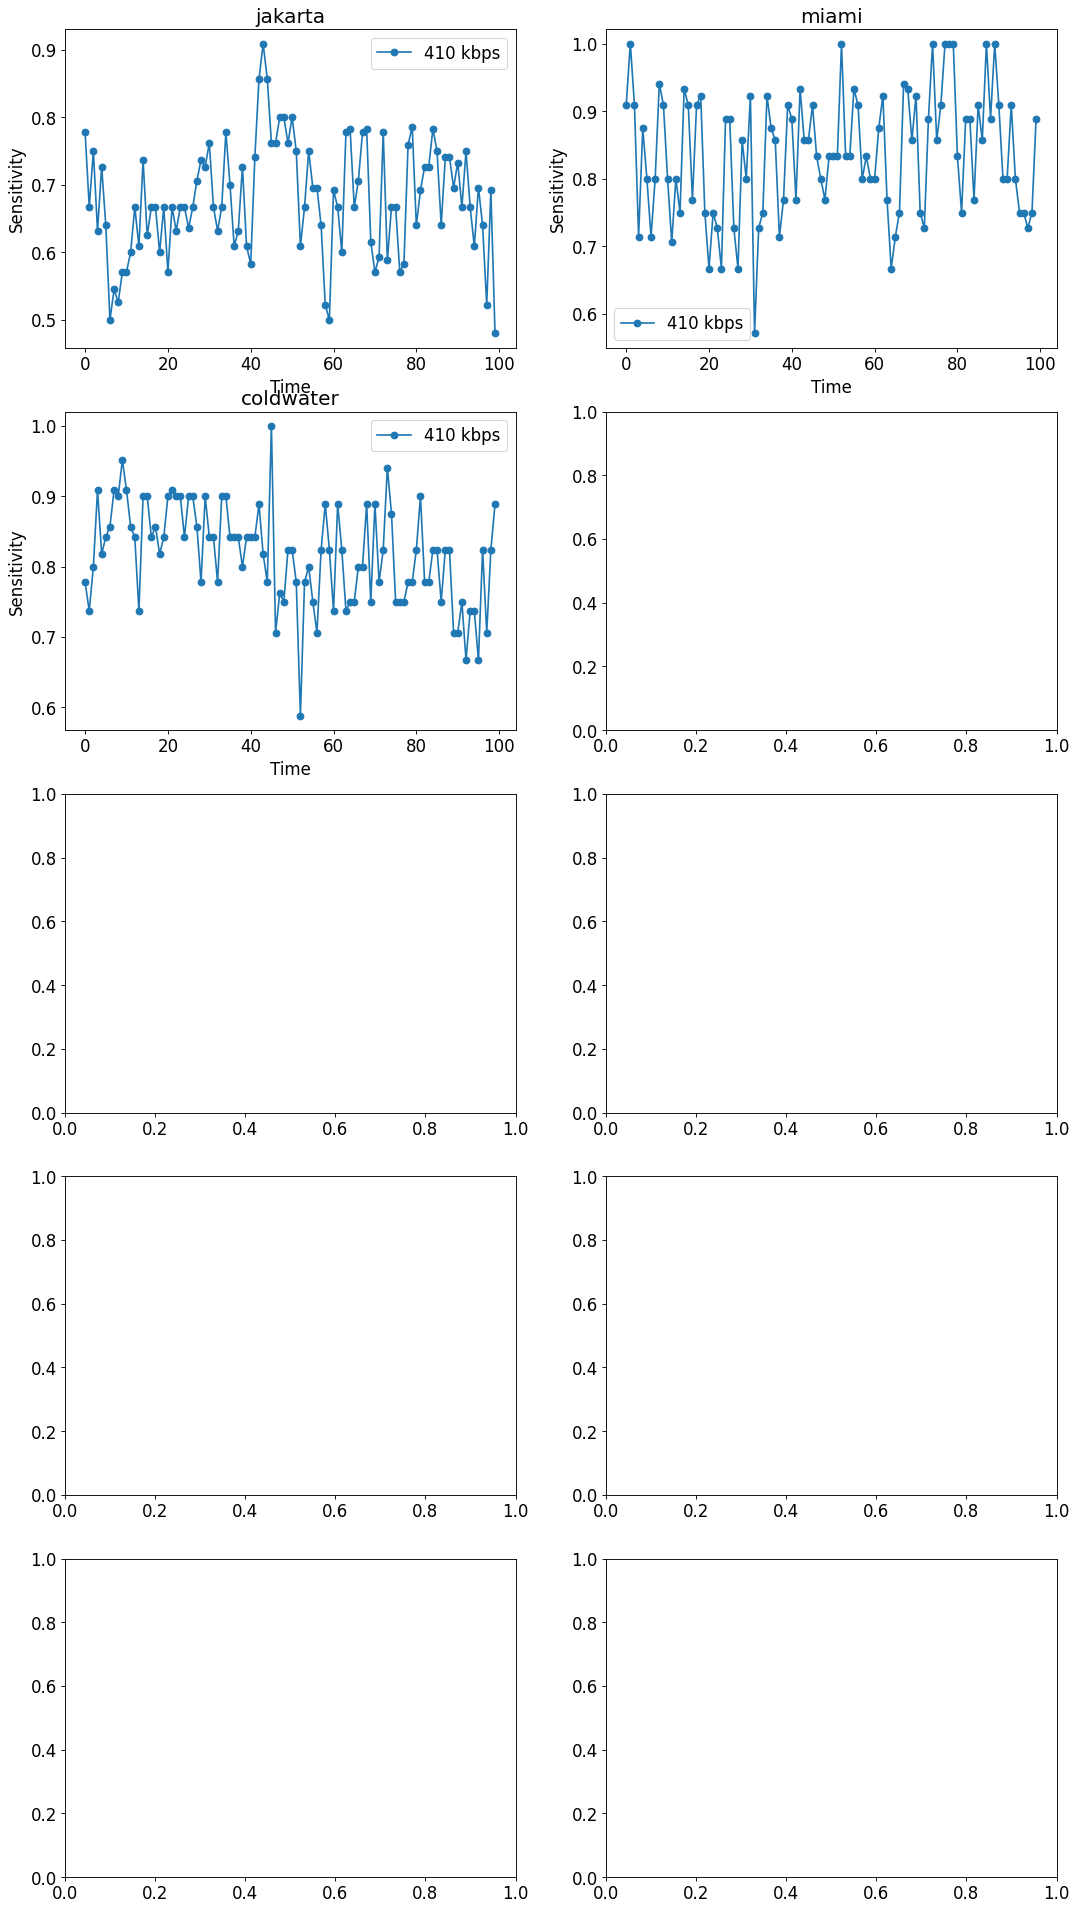

In [12]:
sensd = plotSensitivity([410, 400, 390], 100)

In [13]:
pos = 1
india = sensd[1][0]
aberdeen = sensd[0][0]
# highway_4 = sensd[-2][pos]
# coldwater = sensd[3][pos]
lagrange = sensd[-1][0]

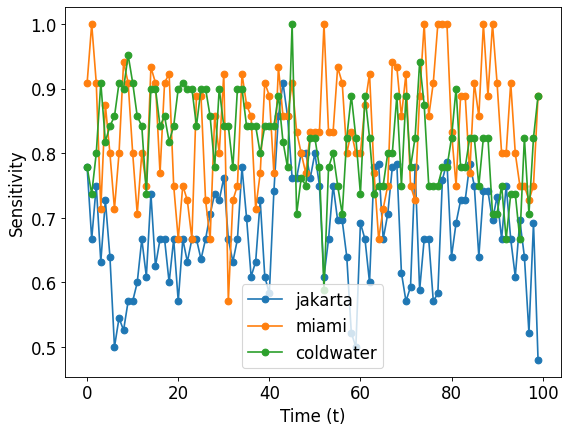

In [14]:
plt.figure(figsize=(8,6), dpi=80)

plt.xlabel('Time (t)')
plt.ylabel('Sensitivity')
plt.rcParams.update({'font.size': 15})
x_axis = [i for i in range(0,50*2,1)]

# jakarta_line = plt.plot(x_axis, highway,
# 'o-',
# label = 'highway',)
# aberdeen_line = plt.plot(x_axis, aberdeen,
# 'o-',
# label = 'Aberdeen',)
i40W_line = plt.plot(x_axis, aberdeen[0:100],
'o-',
label = 'jakarta',)
india_line = plt.plot(x_axis, india[0:100],
'o-',
label = 'miami',)
lag_line = plt.plot(x_axis, lagrange[0:100],
'o-',
label = 'coldwater',)
# plt.vlines(18, 0.25, 0.35, "k", "dashed") # India
# plt.vlines(44, 0.5, 0.65, "k", "dashed") # Aberdeen
# indPos = 23
# abPos = 44
# plt.hlines(india[indPos], 0, indPos, "k", "dashed")
# plt.hlines(aberdeen[abPos], 0, abPos, "k", "dashed")



# y-axis percentage
# plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

plt.ticklabel_format(style='plain', axis='x', )

plt.legend()

In [10]:
india[18] - aberdeen[44]

0.06600000000000006

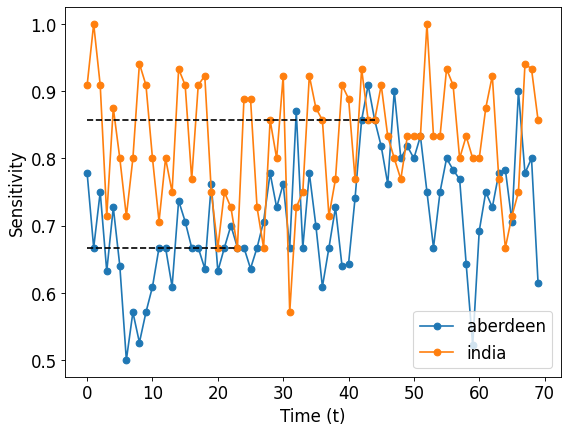

In [11]:
plt.figure(figsize=(8,6), dpi=80)

plt.xlabel('Time (t)')
plt.ylabel('Sensitivity')
plt.rcParams.update({'font.size': 15})
x_axis = [i for i in range(0,35*2,1)]

# jakarta_line = plt.plot(x_axis, highway,
# 'o-',
# label = 'highway',)
# aberdeen_line = plt.plot(x_axis, aberdeen,
# 'o-',
# label = 'Aberdeen',)
i40W_line = plt.plot(x_axis, aberdeen[0:70],
'o-',
label = 'aberdeen',)
india_line = plt.plot(x_axis, india[0:70],
'o-',
label = 'india',)
# plt.vlines(18, 0.25, 0.35, "k", "dashed") # India
# plt.vlines(44, 0.5, 0.65, "k", "dashed") # Aberdeen
indPos = 23
abPos = 44
plt.hlines(india[indPos], 0, indPos, "k", "dashed")
plt.hlines(aberdeen[abPos], 0, abPos, "k", "dashed")



# y-axis percentage
# plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

plt.ticklabel_format(style='plain', axis='x', )

plt.legend()

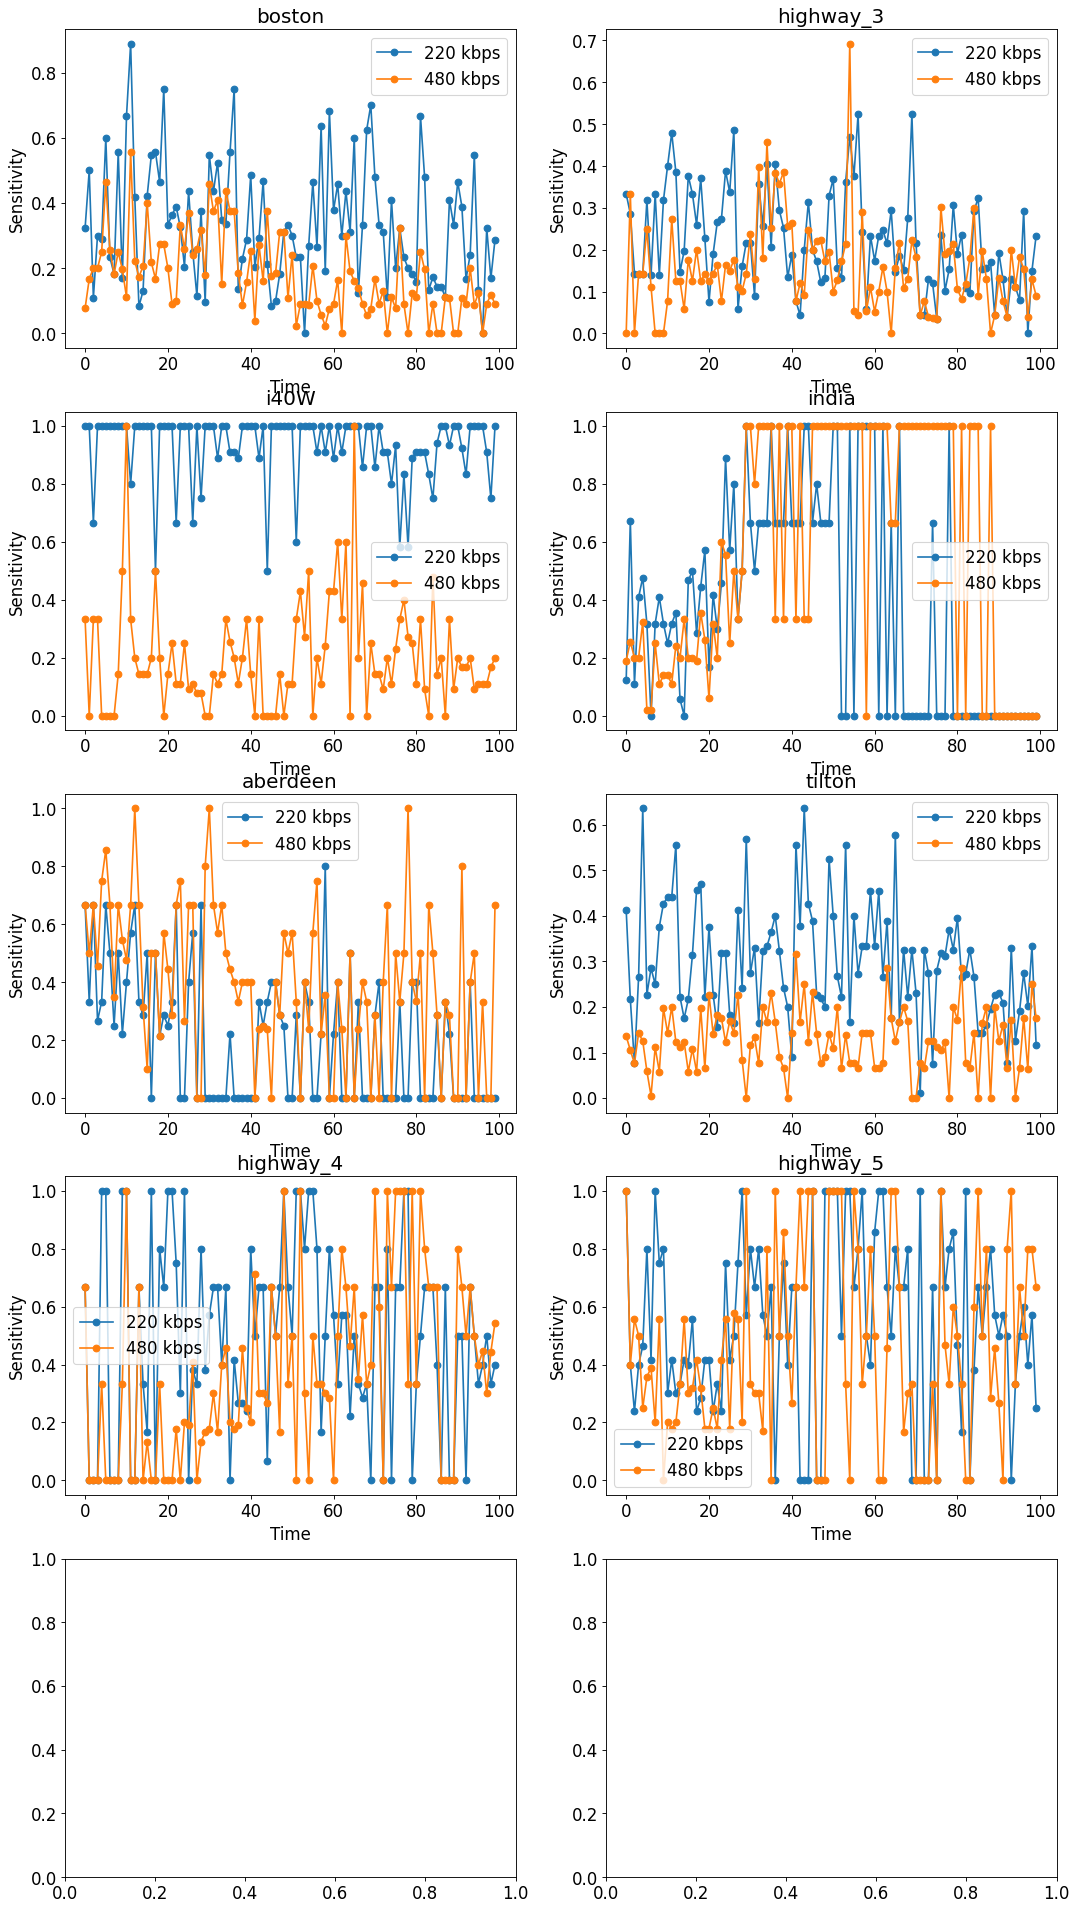

In [28]:
sensd = plotSensitivity([220, 480], 100)

In [29]:
pos = 1
india = sensd[3][0]
i40W = sensd[2][pos]
aberdeen = sensd[4][pos]
highway_4 = sensd[-2][pos]
# coldwater = sensd[3][pos]

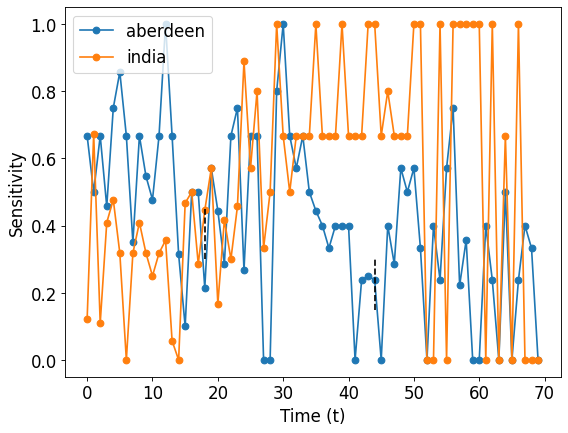

In [30]:
plt.figure(figsize=(8,6), dpi=80)

plt.xlabel('Time (t)')
plt.ylabel('Sensitivity')
plt.rcParams.update({'font.size': 15})
x_axis = [i for i in range(0,35*2,1)]

# jakarta_line = plt.plot(x_axis, highway,
# 'o-',
# label = 'highway',)
# aberdeen_line = plt.plot(x_axis, aberdeen,
# 'o-',
# label = 'Aberdeen',)
i40W_line = plt.plot(x_axis, aberdeen[0:70],
'o-',
label = 'aberdeen',)
india_line = plt.plot(x_axis, india[0:70],
'o-',
label = 'india',)
plt.vlines(18, 0.3, 0.45, "k", "dashed")
plt.vlines(44, 0.15, 0.3, "k", "dashed")



# y-axis percentage
# plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

plt.ticklabel_format(style='plain', axis='x', )

plt.legend()

In [13]:
pos = 1
jakarta = sensd[1][pos]
i40W = sensd[-1][pos]
highway = sensd[0][pos]
uav1 = sensd[-2][pos]
coldwater = sensd[3][pos]
timesquare=sensd[5][pos]
lagrange=sensd[7][pos]

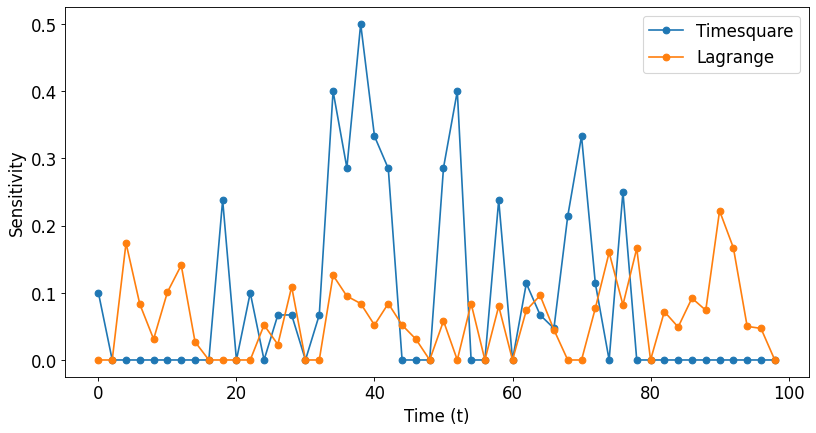

In [14]:
plt.figure(figsize=(12,6), dpi=80)

plt.xlabel('Time (t)')
plt.ylabel('Sensitivity')

x_axis = [i for i in range(0,len(jakarta)*2,2)]

# jakarta_line = plt.plot(x_axis, highway,
# 'o-',
# label = 'highway',)
i40W_line = plt.plot(x_axis, timesquare,
'o-',
label = 'Timesquare',)
# uav1_line = plt.plot(x_axis, uav1,
# 'o-',
# label = 'uav-1',)
uav1_line = plt.plot(x_axis, lagrange,
'o-',
label = 'Lagrange',)

# y-axis percentage
# plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

plt.ticklabel_format(style='plain', axis='x', )

plt.legend()